In [1]:
import numpy as np
import qutip as qt
import math
import matplotlib.pyplot as plt
from q_solve import generate_result
from Schmidt_solve import compute_schmidt_states
from VN import plot_VN
from VN import compute_VN_time


In [2]:
#defining all quantities used in the simulation
d1, d2 = 10, 200
w = 0.3# smallest weight of the 2 eingestates, set btw 0 and 1
E_spacing = 1.0
Int_strength = 0.03
# Define the time settings for the simulation
tmax= 10
ind_nb = 100
#using all above to obtain QM qtts
result, tlist, H_q, H_system_2, H_system_1_ext, H_system_2_ext, H_interaction, H_total, ket_0, ket_1, initial_state_system_2 = generate_result(d1,d2,w, E_spacing, Int_strength, tmax, ind_nb,1)
time_indices = [0, 10, 20, 30, 49]  # Specify the time indices of interest

In [19]:
time_index = 0  # Define the time index
s0 = compute_schmidt_states(result, time_index, 1)[0]

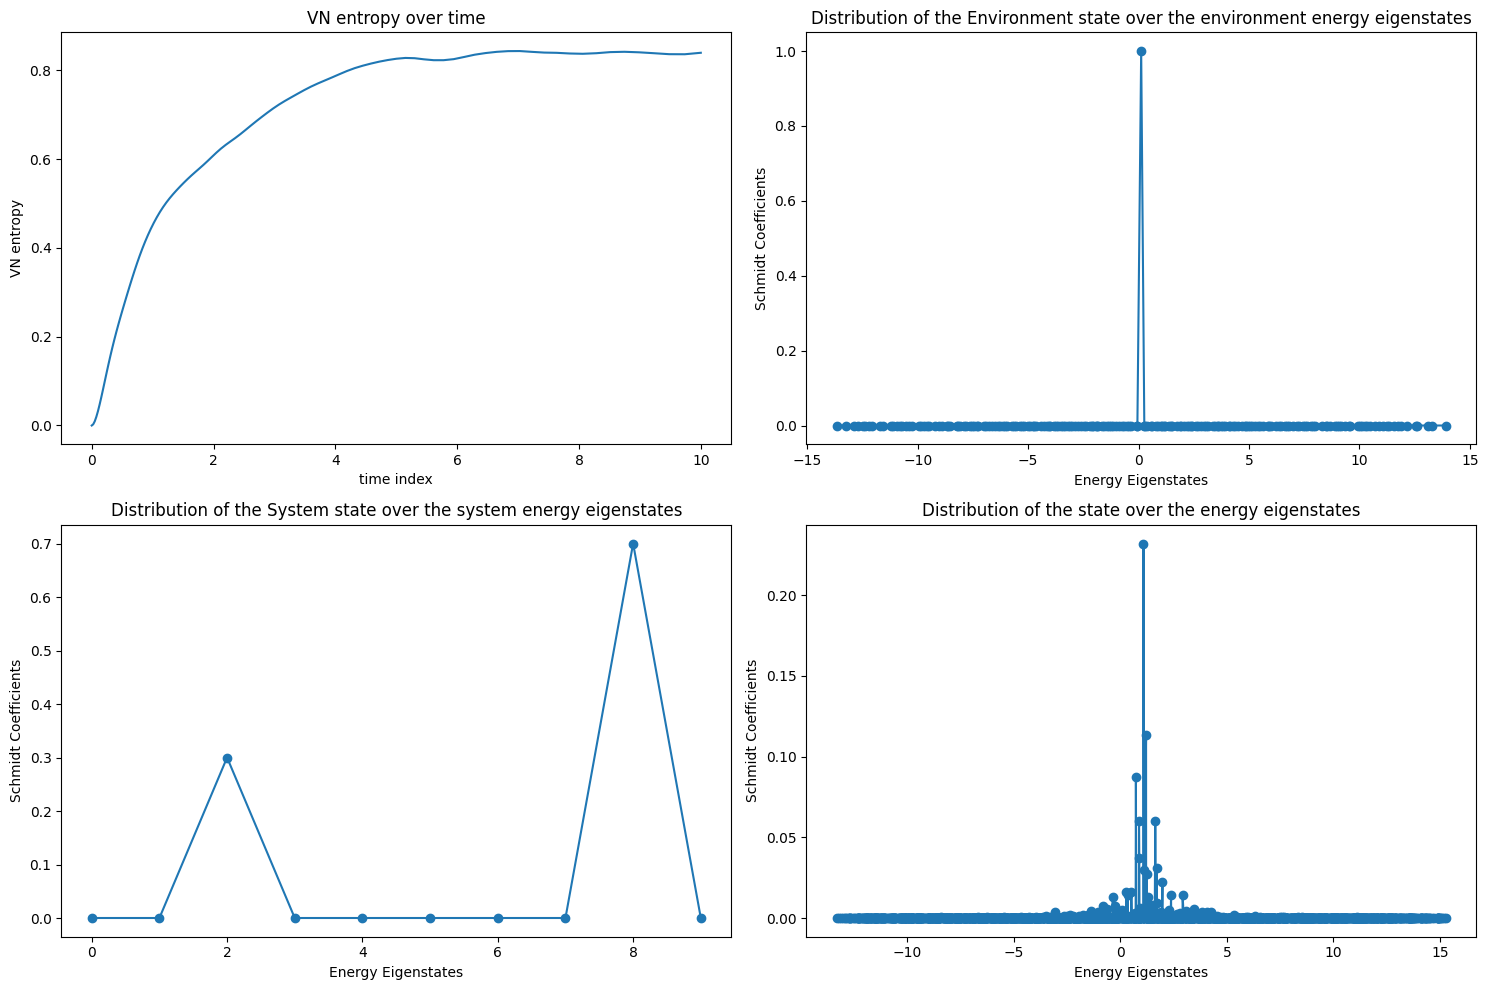

In [20]:
######This is a checkup to see if you program works


# Eigenstates and eigenenergies 
eigenenergies_system_2, eigenstates_system_2 = H_system_2.eigenstates() 
eigenenergies_system_total, eigenstates_system_total = H_total.eigenstates() 
eigenenergies_system_1, eigenstates_system_1 = H_q.eigenstates() 
# Create a 2x2 grid of plots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
v2 = compute_VN_time(result,tlist)

# Plot 1: VN entropy over time
axes[0, 0].plot(tlist, v2)
axes[0, 0].set_title("VN entropy over time")
axes[0, 0].set_xlabel("time index")
axes[0, 0].set_ylabel("VN entropy")

# Plot 2: Distribution of the Environment state over the environment energy eigenstates
time_index = 0  # Define the time index
s0 = compute_schmidt_states(result, time_index, 1)[0]
schmidt_coefficients0 = [abs(np.vdot(s0, eigenstate)) ** 2 for eigenstate in eigenstates_system_2]
axes[0, 1].plot(eigenenergies_system_2, schmidt_coefficients0, marker='o', label=f'Energy {eigenenergies_system_2}')
axes[0, 1].set_title("Distribution of the Environment state over the environment energy eigenstates")
axes[0, 1].set_xlabel("Energy Eigenstates")
axes[0, 1].set_ylabel("Schmidt Coefficients")



# Plot 3: Distribution of the System state over the system energy eigenstates
s0 = compute_schmidt_states(result, time_index, 0)[0]
schmidt_coefficients0 = [abs(np.vdot(s0, eigenstate)) ** 2 for eigenstate in eigenstates_system_1]
axes[1, 0].plot(eigenenergies_system_1, schmidt_coefficients0, marker='o', label=f'Energy {eigenenergies_system_1}')
axes[1, 0].set_title("Distribution of the System state over the system energy eigenstates")
axes[1, 0].set_xlabel("Energy Eigenstates")
axes[1, 0].set_ylabel("Schmidt Coefficients")

# Plot 4: Distribution of the state over the energy eigenstates
s0 = result.states[0]
schmidt_coefficients0 = [abs(np.vdot(s0, eigenstate)) ** 2 for eigenstate in eigenstates_system_total]
axes[1, 1].plot(eigenenergies_system_total, schmidt_coefficients0, marker='o', label=f'Energy {eigenenergies_system_total}')
axes[1, 1].set_title("Distribution of the state over the energy eigenstates")
axes[1, 1].set_xlabel("Energy Eigenstates")
axes[1, 1].set_ylabel("Schmidt Coefficients")

plt.tight_layout()  # Adjust spacing between subplots
plt.show()

In [13]:
def Neff(H_total,result):
    eigenenergies_total, eigenstates_total = H_total.eigenstates() 
    state = result.states[0]
    p2=[(abs(np.vdot(state, eigenstate)) ** 2) ** 2 for eigenstate in eigenstates_total]
    Neff = 1/np.sum(p2)
    return Neff

In [14]:
def plot_e_spectrum(H_total, result):
    eigenenergies_total, eigenstates_total = H_total.eigenstates() 
    state = result.states[0]
    energy_coeff=[abs(np.vdot(state, eigenstate)) ** 2 for eigenstate in eigenstates_total]
    c = np.count_nonzero(energy_coeff)
    N = Neff(H_total,result)
    print(f"Neff_total is {N}")
    num_bins=100
    min_energy=min(eigenenergies_total)
    max_energy=max(eigenenergies_total)
    plt.figure(figsize=(10, 2))
    plt.plot(eigenenergies_total,energy_coeff);
    #looks like a nice wigner semicircle, this is the thing, who's shape changes as the interaction energy increases. lets check that
    plt.figure(figsize=(10, 2))
    plt.hist(eigenenergies_total, bins=num_bins, range=(min_energy, max_energy), edgecolor='black');
    #PERFECT wigner semi cirlce, vs weird cowboy hat

In [67]:
w=0.5

In [68]:
result, tlist, H_q, H_system_2, H_system_1_ext, H_system_2_ext, H_interaction, H_total, ket_0, ket_1, initial_state_system_2 = generate_result(d1,d2,w, E_spacing, 0, tmax, ind_nb,1)

In [69]:
result1, tlist, H_q, H_system_2, H_system_1_ext, H_system_2_ext, H_interaction, H_total1, ket_0, ket_1, initial_state_system_2 = generate_result(d1,d2,w, E_spacing, 0.01, tmax, ind_nb,1)

In [70]:
result2, tlist, H_q, H_system_2, H_system_1_ext, H_system_2_ext, H_interaction, H_total2, ket_0, ket_1, initial_state_system_2 = generate_result(d1,d2,w, E_spacing, 0.05, tmax, ind_nb,1)

In [71]:
result3, tlist, H_q, H_system_2, H_system_1_ext, H_system_2_ext, H_interaction, H_total3, ket_0, ket_1, initial_state_system_2 = generate_result(d1,d2,w, E_spacing, 0.08, tmax, ind_nb,1)

In [72]:
result4, tlist, H_q, H_system_2, H_system_1_ext, H_system_2_ext, H_interaction, H_total4, ket_0, ket_1, initial_state_system_2 = generate_result(d1,d2,w, E_spacing, 0.1, tmax, ind_nb,1)

In [73]:
result5, tlist, H_q, H_system_2, H_system_1_ext, H_system_2_ext, H_interaction, H_total5, ket_0, ket_1, initial_state_system_2 = generate_result(d1,d2,w, E_spacing, 0.12, tmax, ind_nb,1)

In [74]:
result6, tlist, H_q, H_system_2, H_system_1_ext, H_system_2_ext, H_interaction, H_total6, ket_0, ket_1, initial_state_system_2 = generate_result(d1,d2,w, E_spacing, 0.15, tmax, ind_nb,1)

In [75]:
result8, tlist, H_q, H_system_2, H_system_1_ext, H_system_2_ext, H_interaction, H_total8, ket_0, ket_1, initial_state_system_2 = generate_result(d1,d2,w, E_spacing, 0.2, tmax, ind_nb,1)

In [76]:
result9, tlist, H_q, H_system_2, H_system_1_ext, H_system_2_ext, H_interaction, H_total9, ket_0, ket_1, initial_state_system_2 = generate_result(d1,d2,w, E_spacing, 0.25, tmax, ind_nb,1)

In [77]:
result10, tlist, H_q, H_system_2, H_system_1_ext, H_system_2_ext, H_interaction, H_total10, ket_0, ket_1, initial_state_system_2 = generate_result(d1,d2,w, E_spacing, 1, tmax, ind_nb,1)

2.000000000000001


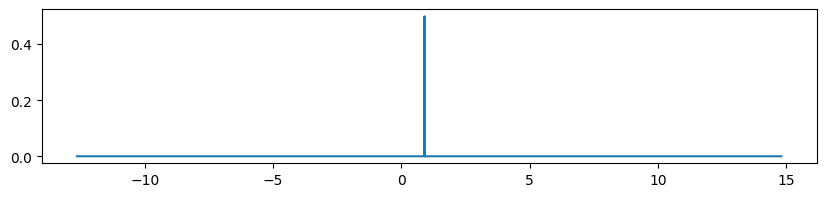

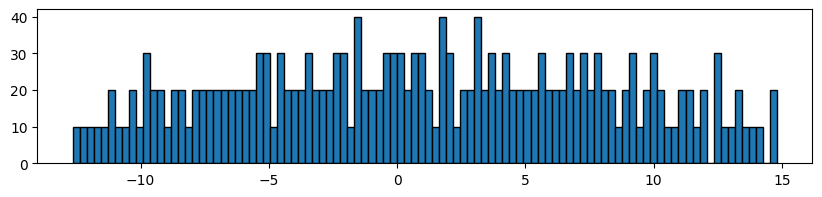

In [78]:
plot_e_spectrum(H_total,result)

2.7899123645257085


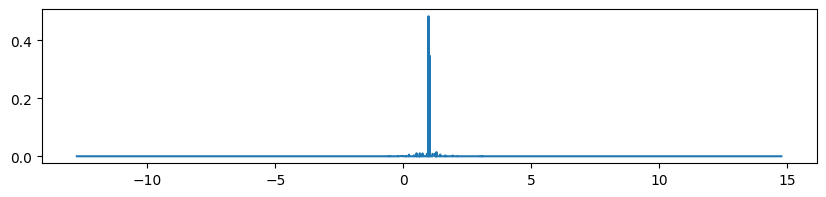

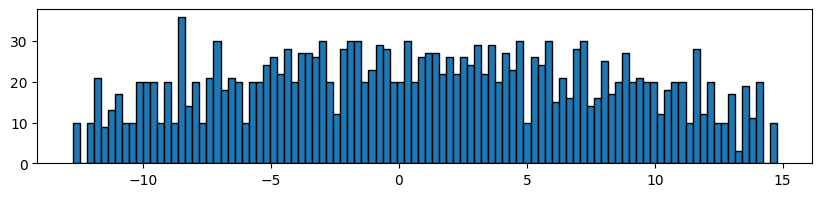

In [79]:
plot_e_spectrum(H_total1,result1)

6.3513902767028725


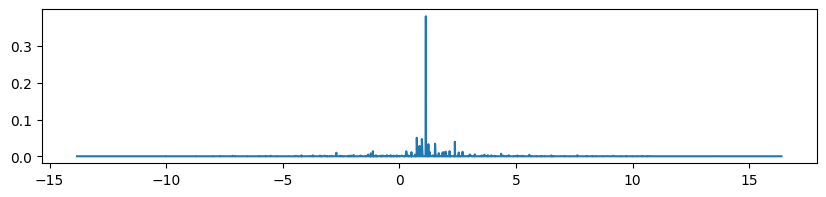

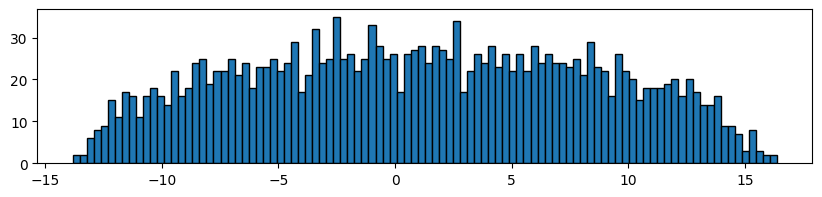

In [80]:
plot_e_spectrum(H_total2,result2)

19.499439398606448


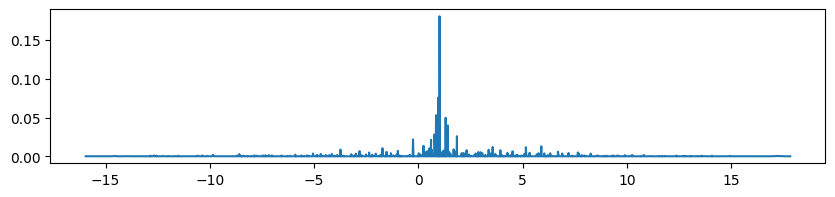

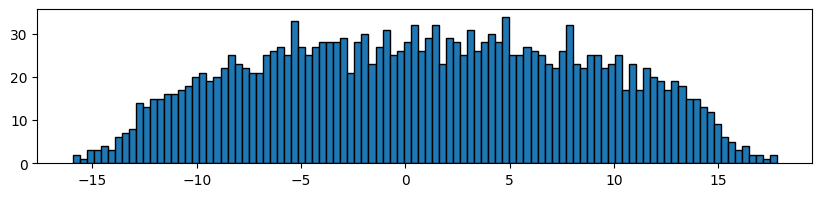

In [81]:
plot_e_spectrum(H_total3,result3)

39.76671973723947


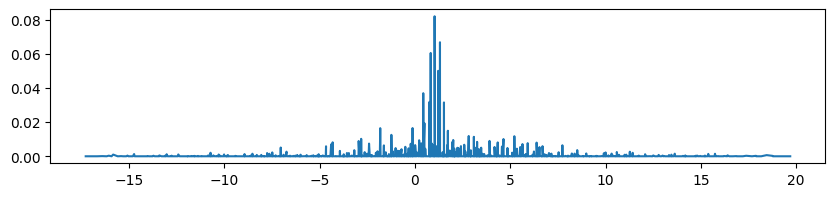

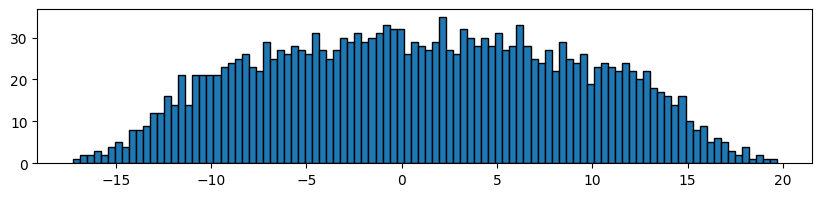

In [82]:
plot_e_spectrum(H_total4,result4)

54.823563738148955


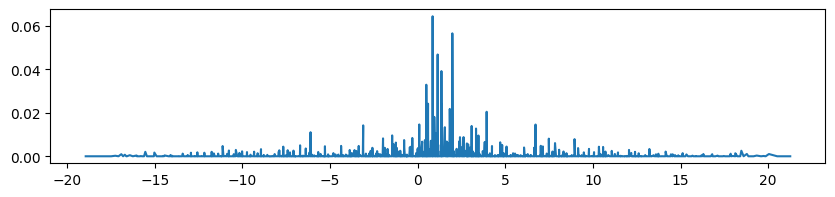

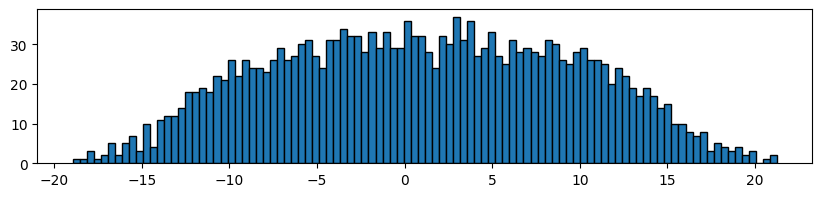

In [83]:
plot_e_spectrum(H_total5,result5)

51.574496504987756


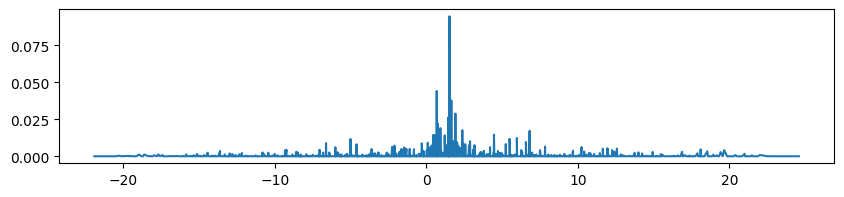

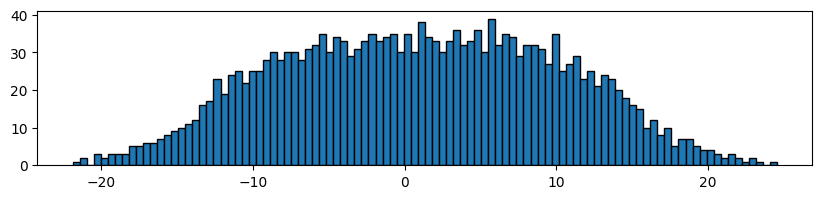

In [84]:
plot_e_spectrum(H_total6,result6)

In [85]:
#7???

72.579430618578


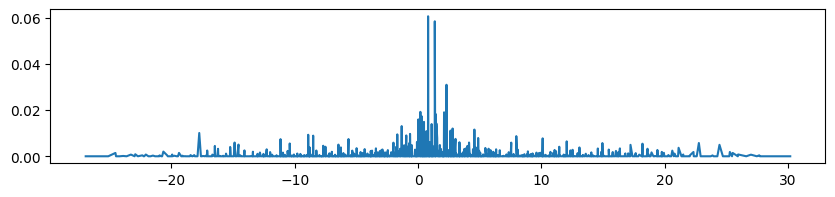

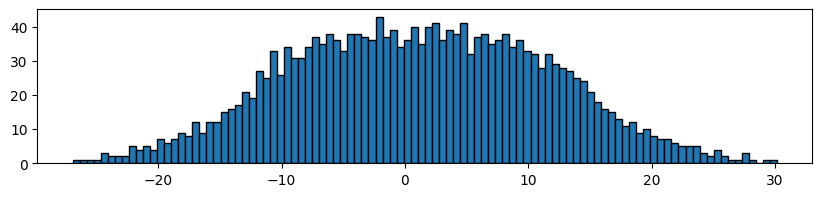

In [86]:
plot_e_spectrum(H_total8,result8)

106.12955499883486


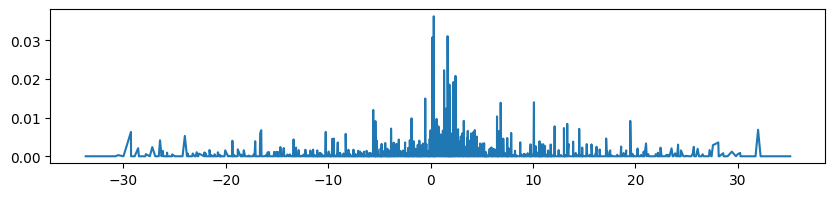

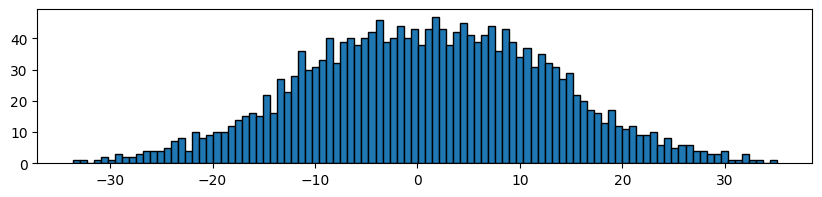

In [87]:
plot_e_spectrum(H_total9,result9)

209.16326259095126


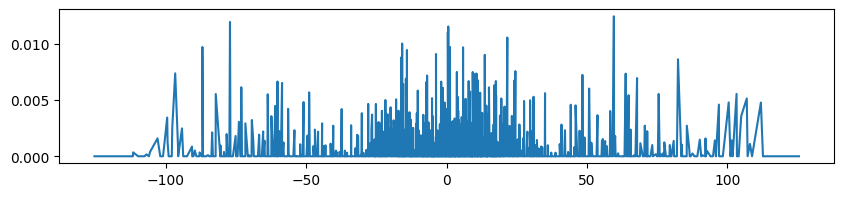

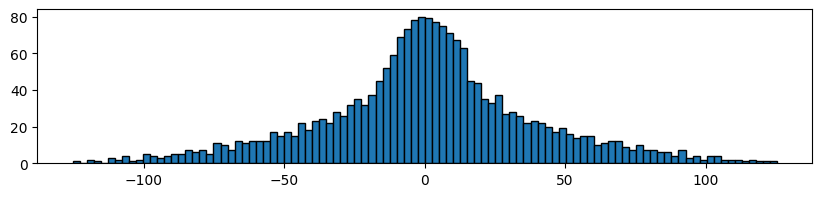

In [88]:
plot_e_spectrum(H_total10,result10)

In [11]:
#computign the neffschmidt/neffttot
#delta = Neff_schmidt/Neff_tot

def plot_Neff_schmidt(H_total, result):
    eigenenergies_total, eigenstates_total = H_total.eigenstates()
    coef1 = []
    coef2 = []
    coef3 = []

    for idx in range(len(tlist)):
        a = compute_schmidt_states(result, idx, 0, 0)[0] #schmidt 1 on system 1
        b = compute_schmidt_states(result, idx, 1, 0)[0] #schmidt 2 on system 1
        c = compute_schmidt_states(result, idx, 0, 0)[1] #schmidt 1 on system 1
        d = compute_schmidt_states(result, idx, 1, 0)[1] #schmidt 2 on system 1
        e = compute_schmidt_states(result, idx, 0, 0)[2] #schmidt 1 on system 1
        f = compute_schmidt_states(result, idx, 1, 0)[2] #schmidt 2 on system 1
        g = np.tensordot(a, b, 0)
        h = np.tensordot(c, d, 0)
        i = np.tensordot(e, f, 0)
        p2=[(abs(np.vdot(g, eigenstate)) ** 2) ** 2 for eigenstate in eigenstates_total]
        p2_=[(abs(np.vdot(h, eigenstate)) ** 2) ** 2 for eigenstate in eigenstates_total]
        p2__=[(abs(np.vdot(i, eigenstate)) ** 2) ** 2 for eigenstate in eigenstates_total]
        coef1.append(1/np.sum(p2))
        coef2.append(1/np.sum(p2_))
        coef3.append(1/np.sum(p2__))
    
    plt.figure(figsize=(10, 2))
    plt.xscale("log")
    plt.plot(coef1)
    plt.plot(coef2)
    plt.plot(coef3)

def plot_delta(H_total, result):
    eigenenergies_total, eigenstates_total = H_total.eigenstates()
    p=[(abs(np.vdot(result.states[1], eigenstate)) ** 2) ** 2 for eigenstate in eigenstates_total]
    coef1 = []
    coef2 = []
    coef3 = []
    coeft = 1/np.sum(p)

    for idx in range(len(tlist)):
        a = compute_schmidt_states(result, idx, 0, 0)[0] #schmidt 1 on system 1
        b = compute_schmidt_states(result, idx, 1, 0)[0] #schmidt 2 on system 1
        c = compute_schmidt_states(result, idx, 0, 0)[1] #schmidt 1 on system 1
        d = compute_schmidt_states(result, idx, 1, 0)[1] #schmidt 2 on system 1
        e = compute_schmidt_states(result, idx, 0, 0)[2] #schmidt 1 on system 1
        f = compute_schmidt_states(result, idx, 1, 0)[2] #schmidt 2 on system 1
        g = np.tensordot(a, b, 0)
        h = np.tensordot(c, d, 0)
        i = np.tensordot(e, f, 0)
        p2=[(abs(np.vdot(g, eigenstate)) ** 2) ** 2 for eigenstate in eigenstates_total]
        p2_=[(abs(np.vdot(h, eigenstate)) ** 2) ** 2 for eigenstate in eigenstates_total]
        p2__=[(abs(np.vdot(i, eigenstate)) ** 2) ** 2 for eigenstate in eigenstates_total]
        coef1.append(1/np.sum(p2))
        coef2.append(1/np.sum(p2_))
        coef3.append(1/np.sum(p2__))
    
    c1=coef1/coeft
    c2=coef2/coeft
    c3=coef3/coeft
    plt.figure(figsize=(10, 2))
    plt.xscale("log")
    plt.yscale("log")
    plt.plot(c1)
    plt.plot(c2)
    plt.plot(c3)
    plt.title("Graph of Neff_schmidt/Neff_tot over time")
    plt.xlabel("Time")
    plt.ylabel("Neff_schmidt/Neff_tot")
    plt.legend(['Schmidt 1', 'Schmidt 2','Schmidt 3'])

C:\Users\marin\AppData\Local\Temp\ipykernel_4480\1305589649.py:56: RuntimeWarning: divide by zero encountered in scalar divide
  coef3.append(1/np.sum(p2__))


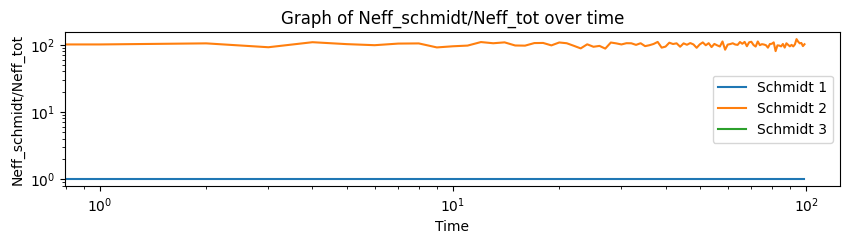

In [90]:
plot_delta(H_total,result)

C:\Users\marin\AppData\Local\Temp\ipykernel_4480\1305589649.py:56: RuntimeWarning: divide by zero encountered in scalar divide
  coef3.append(1/np.sum(p2__))


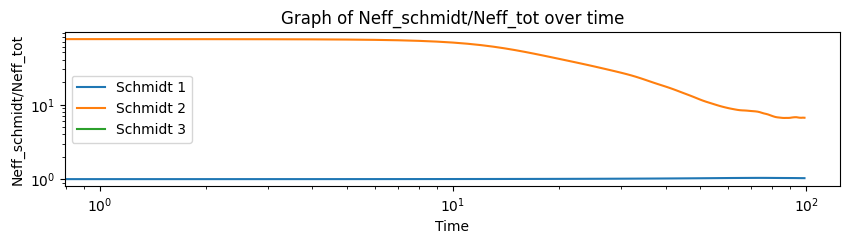

In [91]:
plot_delta(H_total1,result1)

C:\Users\marin\AppData\Local\Temp\ipykernel_4480\1305589649.py:56: RuntimeWarning: divide by zero encountered in scalar divide
  coef3.append(1/np.sum(p2__))


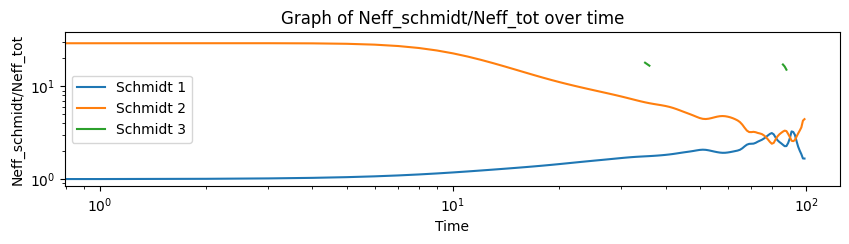

In [92]:
plot_delta(H_total2,result2)

C:\Users\marin\AppData\Local\Temp\ipykernel_4480\1305589649.py:56: RuntimeWarning: divide by zero encountered in scalar divide
  coef3.append(1/np.sum(p2__))


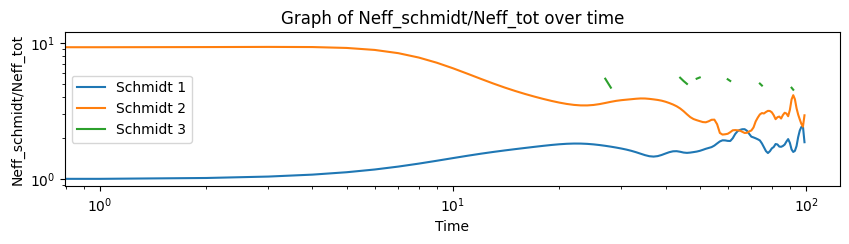

In [93]:
plot_delta(H_total3,result3)

C:\Users\marin\AppData\Local\Temp\ipykernel_4480\1305589649.py:56: RuntimeWarning: divide by zero encountered in scalar divide
  coef3.append(1/np.sum(p2__))


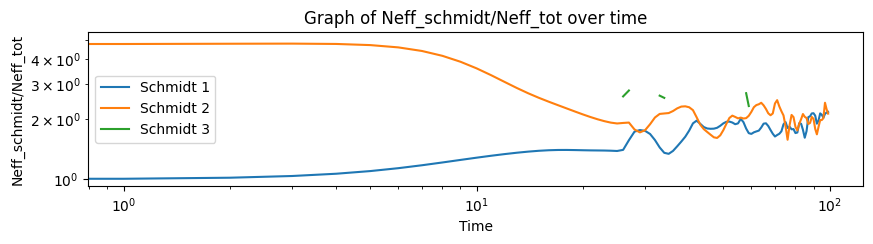

In [94]:
plot_delta(H_total4,result4)

C:\Users\marin\AppData\Local\Temp\ipykernel_4480\1305589649.py:56: RuntimeWarning: divide by zero encountered in scalar divide
  coef3.append(1/np.sum(p2__))


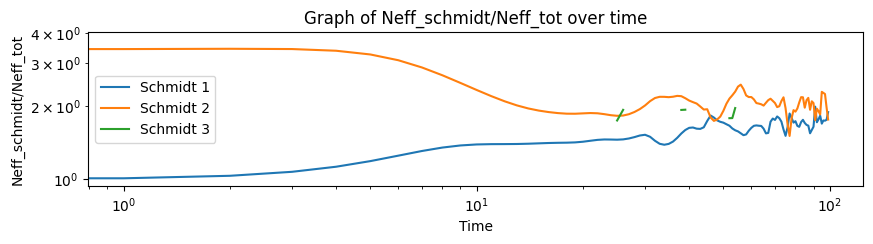

In [95]:
plot_delta(H_total5,result5)

C:\Users\marin\AppData\Local\Temp\ipykernel_4480\1305589649.py:56: RuntimeWarning: divide by zero encountered in scalar divide
  coef3.append(1/np.sum(p2__))


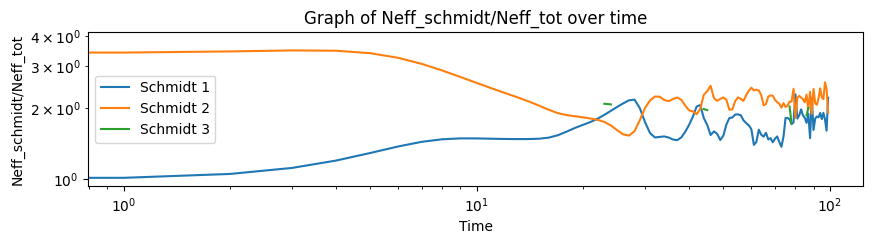

In [96]:
plot_delta(H_total6,result6)

In [97]:
#plot_delta(H_total7,result7)

C:\Users\marin\AppData\Local\Temp\ipykernel_4480\1305589649.py:56: RuntimeWarning: divide by zero encountered in scalar divide
  coef3.append(1/np.sum(p2__))


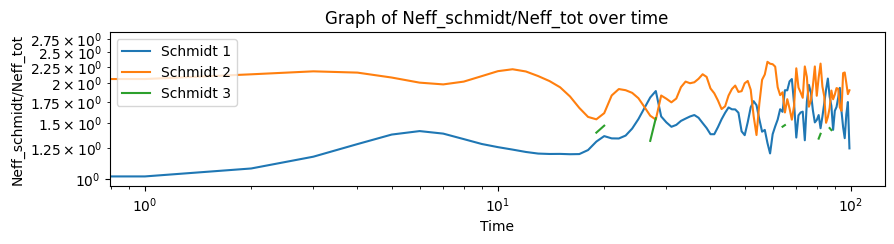

In [98]:
plot_delta(H_total8,result8)

C:\Users\marin\AppData\Local\Temp\ipykernel_4480\1305589649.py:56: RuntimeWarning: divide by zero encountered in scalar divide
  coef3.append(1/np.sum(p2__))


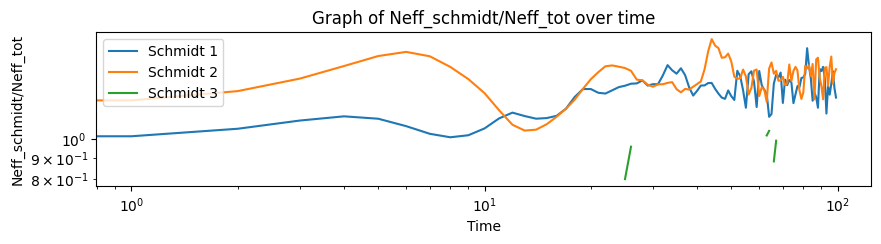

In [99]:
plot_delta(H_total9,result9)

C:\Users\marin\AppData\Local\Temp\ipykernel_4480\1305589649.py:56: RuntimeWarning: divide by zero encountered in scalar divide
  coef3.append(1/np.sum(p2__))


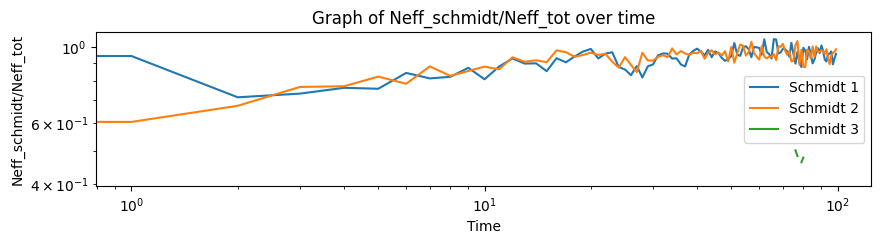

In [100]:
plot_delta(H_total10,result10)

In [107]:
result_a, tlist, H_q, H_system_2, H_system_1_ext, H_system_2_ext, H_interaction, H_totala, ket_0, ket_1, initial_state_system_2 = generate_result(10,200,0.5, E_spacing, 0.09, 50, 1000,1)

21.04762858600481


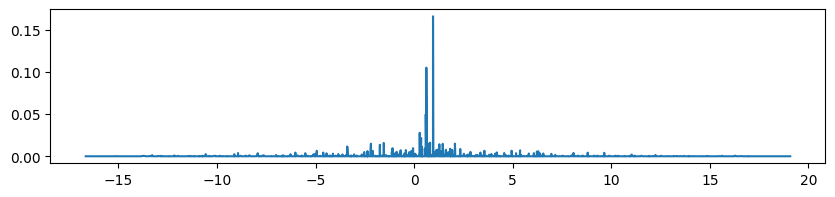

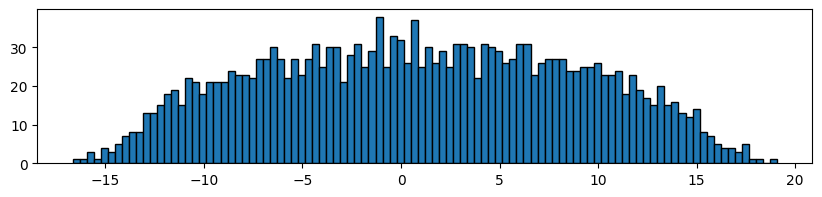

In [108]:
plot_e_spectrum(H_totala,result_a)

C:\Users\marin\AppData\Local\Temp\ipykernel_4480\1305589649.py:56: RuntimeWarning: divide by zero encountered in scalar divide
  coef3.append(1/np.sum(p2__))


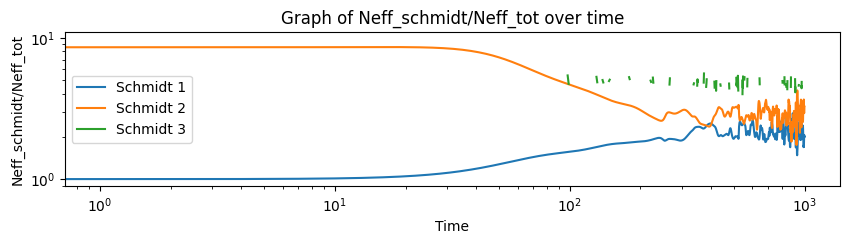

In [109]:
plot_delta(H_totala,result_a)

In [9]:
result_b1, tlist, H_q, H_system_2, H_system_1_ext, H_system_2_ext, H_interaction, H_totalb1, ket_0, ket_1, initial_state_system_2 = generate_result(10,200,0.5, E_spacing, 0.1, 10,100,1)
result_b2, tlist, H_q, H_system_2, H_system_1_ext, H_system_2_ext, H_interaction, H_totalb2, ket_0, ket_1, initial_state_system_2 = generate_result(10,200,0.3, E_spacing, 0.1, 10,100,1)

Neff_total is 61.73549030484271
Neff_total is 92.06063314667121


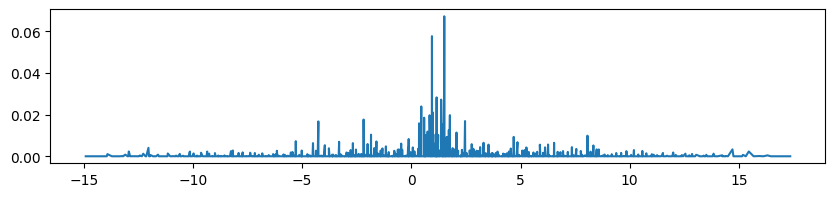

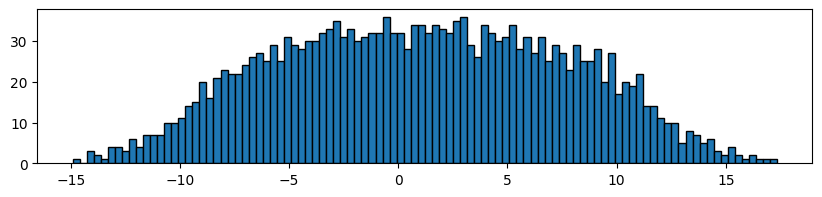

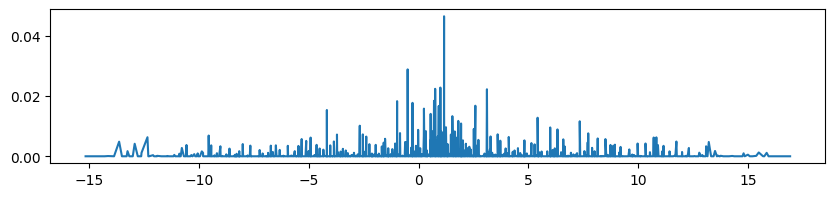

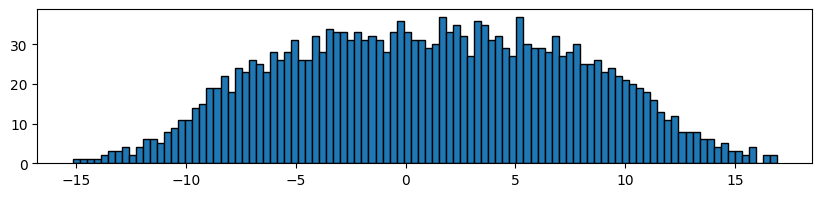

In [15]:
plot_e_spectrum(H_totalb1,result_b1)
plot_e_spectrum(H_totalb2,result_b2)

C:\Users\marin\AppData\Local\Temp\ipykernel_15112\1305589649.py:56: RuntimeWarning: divide by zero encountered in scalar divide
  coef3.append(1/np.sum(p2__))


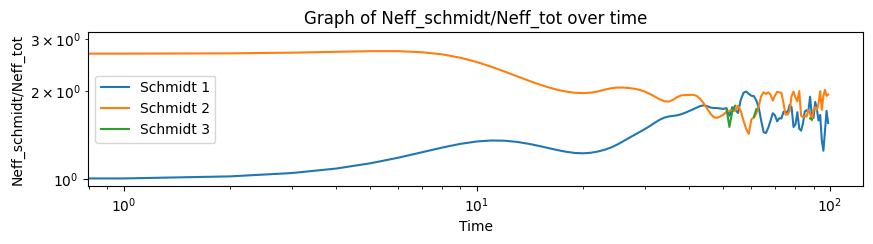

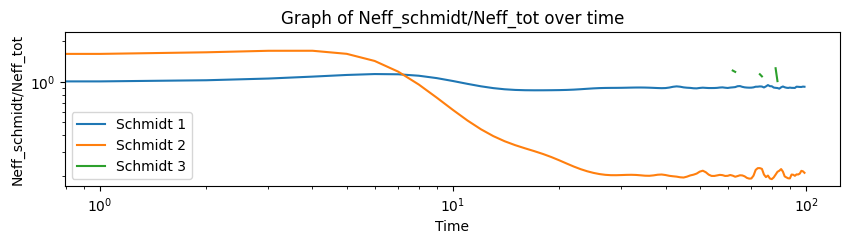

In [16]:
plot_delta(H_totalb1,result_b1)
plot_delta(H_totalb2,result_b2)

In [17]:
result_b1, tlist, H_q, H_system_2, H_system_1_ext, H_system_2_ext, H_interaction, H_totalb1, ket_0, ket_1, initial_state_system_2 = generate_result(10,200,0.4, E_spacing, 0.1, 10,100,1)
result_b2, tlist, H_q, H_system_2, H_system_1_ext, H_system_2_ext, H_interaction, H_totalb2, ket_0, ket_1, initial_state_system_2 = generate_result(10,200,0.2, E_spacing, 0.1, 10,100,1)

Neff_total is 79.91486948796233
Neff_total is 86.00094379645247


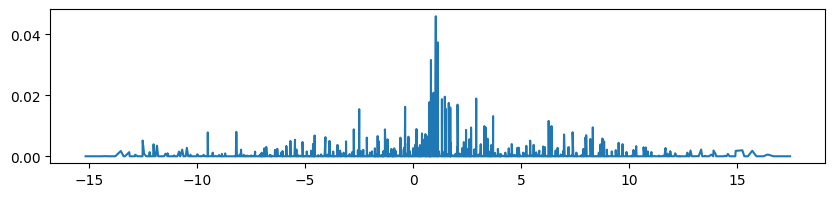

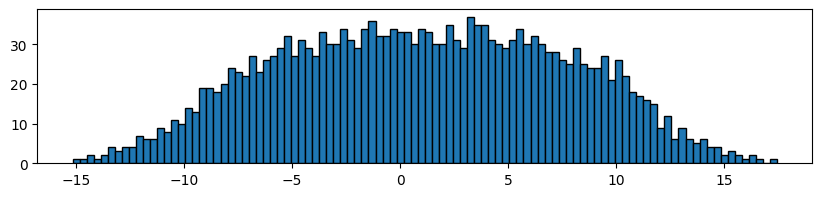

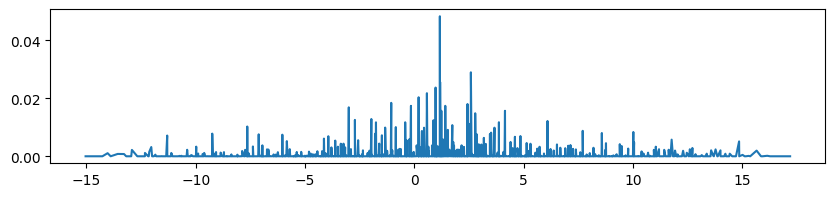

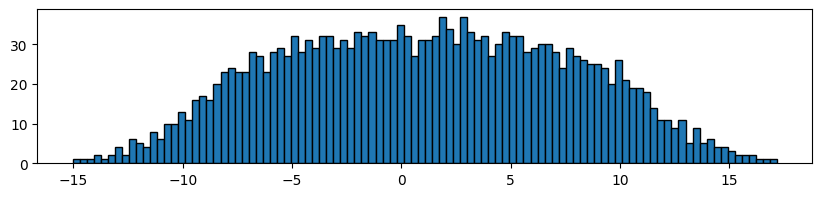

In [18]:
plot_e_spectrum(H_totalb1,result_b1)
plot_e_spectrum(H_totalb2,result_b2)

In [12]:
#trying to reproduce exactly one of Andreas's results

result_b1, tlist, H_q, H_system_2, H_system_1_ext, H_system_2_ext, H_interaction, H_totalb1, ket_0, ket_1, initial_state_system_2 = generate_result(10,200,0.3, E_spacing, 0.06, 100,1000,1)

Neff_total is 31.80111813154154


C:\Users\marin\AppData\Local\Temp\ipykernel_15500\1305589649.py:56: RuntimeWarning: divide by zero encountered in scalar divide
  coef3.append(1/np.sum(p2__))


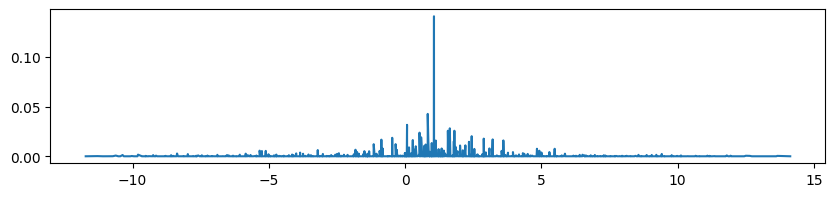

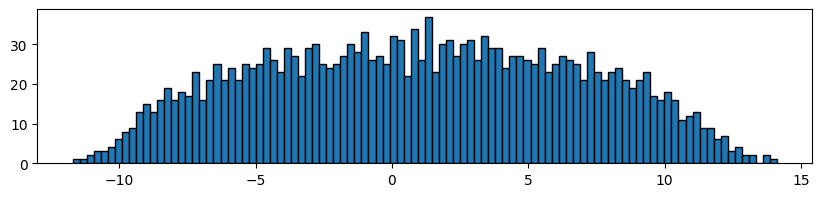

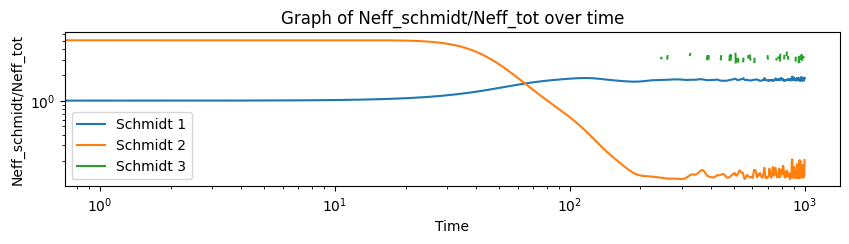

In [13]:
plot_e_spectrum(H_totalb1,result_b1)
plot_delta(H_totalb1,result_b1)


In [19]:
#Defining the overlap of states in probability space
# a measure of similarity of weights in the energie eigenbasis

def get_p_s2(state,eigenstates_total):
    p=[abs(np.vdot(state, eigenstate))  for eigenstate in eigenstates_total]
    return p

def get_p(state,eigenstates_total):
    p=[abs(np.vdot(state, eigenstate)) ** 2 for eigenstate in eigenstates_total]
    return p

def get_p_2(state,eigenstates_total):
    p=[(abs(np.vdot(state, eigenstate)) ** 2) **2 for eigenstate in eigenstates_total]
    return p

def p_overlap(state1,state2,eigenstates_total):
    p1 = get_p_s2(state1,eigenstates_total)
    p2 = get_p_s2(state2,eigenstates_total)
    overlap = np.vdot(p1, p2)
    return overlap

def compute_schmidt_full(result, idx,s=1):
    if s==1:
        a = compute_schmidt_states(result, idx, 0, 0)[0] #schmidt 1 on system 1
        b = compute_schmidt_states(result, idx, 1, 0)[0] #schmidt 2 on system 1
        g = np.tensordot(a, b, 0)
    elif s ==2:
        c = compute_schmidt_states(result, idx, 0, 0)[1] #schmidt 1 on system 1
        d = compute_schmidt_states(result, idx, 1, 0)[1] #schmidt 2 on system 1
        g = np.tensordot(c, d, 0)
    elif s==3:
        e = compute_schmidt_states(result, idx, 0, 0)[2] #schmidt 1 on system 1
        f = compute_schmidt_states(result, idx, 1, 0)[2] #schmidt 2 on system 1
        g = np.tensordot(e, f, 0)
    else: 
        print("wrong input value")
    return g

def plot_p_overlap_graph(tlist,result,H_total):
    o01 = []
    o02 = []
    o12 = []
    eigenenergies_total, eigenstates_total = H_total.eigenstates()
    for idx in range(len(tlist)):
        s1=compute_schmidt_full(result,idx,1)
        s2=compute_schmidt_full(result,idx,2)
        #s3=compute_schmidt_full(result,idx,3)
        o01.append(p_overlap(result.states[idx],s1,eigenstates_total))
        o02.append(p_overlap(result.states[idx],s2,eigenstates_total))
        o12.append(p_overlap(s1,s2,eigenstates_total))

    plt.figure(figsize=(7, 4))
    plt.xscale("log")
    plt.yscale("log")
    plt.plot(o01)
    plt.plot(o02)
    plt.plot(o12)
    plt.title("Graph of the overlap of global v schmidt 1 v schmidt 2")
    plt.xlabel("Time")
    plt.ylabel("sqrt(pi).sqrt(pj)")
    plt.legend(['overlap Global-Schmidt 1', 'overlap Global-Schmidt 2', 'overlap Schmidt 1-Schmidt 2'])


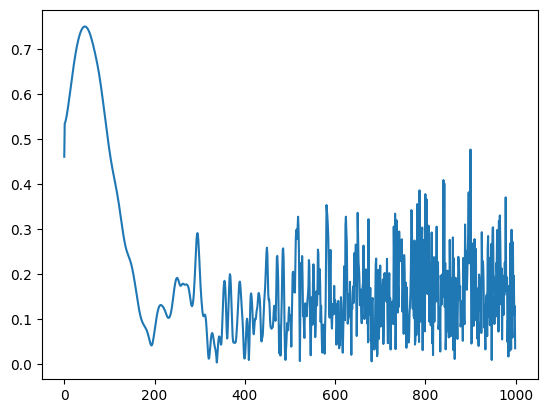

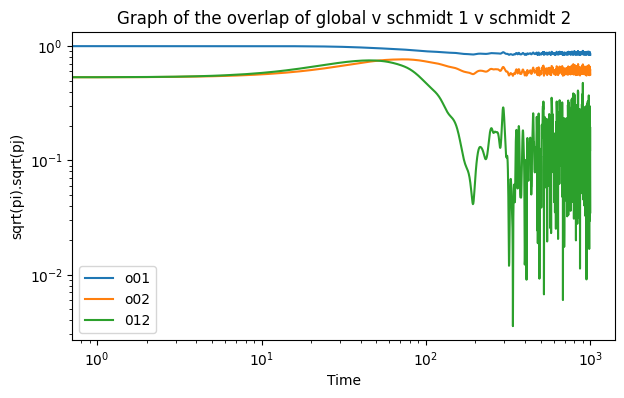

In [5]:
result, tlist, H_q, H_system_2, H_system_1_ext, H_system_2_ext, H_interaction, H_total, ket_0, ket_1, initial_state_system_2 = generate_result(10,200,0.3, E_spacing, 0.06, 1000,1000,1)
plot_p_overlap_graph(tlist,result,H_total)

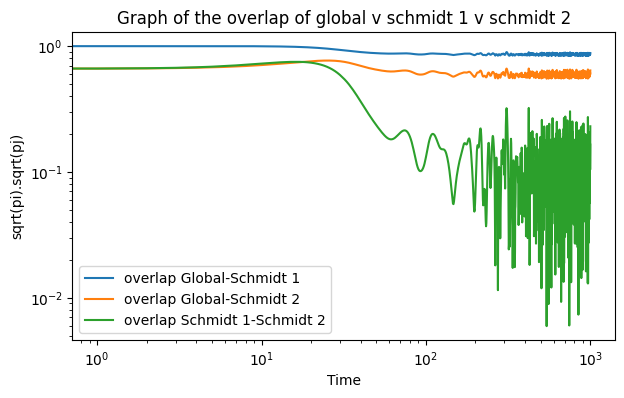

In [20]:
result, tlist, H_q, H_system_2, H_system_1_ext, H_system_2_ext, H_interaction, H_total, ket_0, ket_1, initial_state_system_2 = generate_result(10,200,0.3, E_spacing, 0.15, 1000,1000,1)
plot_p_overlap_graph(tlist,result,H_total)